In [5]:
# https://deepnote.com/@deepnote/Stock-Analysis-in-Python-TPF6Jtm9QgqjVnTWaOzjhQ
# https://data.nasdaq.com/tools/python

!pip install Nasdaq-Data-Link

SyntaxError: invalid syntax (<ipython-input-5-ea4e06ed608e>, line 4)

In [6]:
!pip install Nasdaq-Data-Link

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nasdaqdatalink
my_data = nasdaqdatalink.get("FRED/GDP")
print(my_data)

                Value
Date                 
1947-01-01    243.164
1947-04-01    245.968
1947-07-01    249.585
1947-10-01    259.745
1948-01-01    265.742
...               ...
2020-07-01  21138.574
2020-10-01  21477.597
2021-01-01  22038.226
2021-04-01  22740.959
2021-07-01  23202.344

[299 rows x 1 columns]


In [5]:
## WTI Crude Oil
my_oil_price = nasdaqdatalink.get("EIA/PET_RWTC_D")
print(my_oil_price)

            Value
Date             
1986-01-02  25.56
1986-01-03  26.00
1986-01-06  26.53
1986-01-07  25.85
1986-01-08  25.87
...           ...
2022-01-11  81.17
2022-01-12  82.51
2022-01-13  81.97
2022-01-14  83.82
2022-01-18  85.42

[9106 rows x 1 columns]


In [ ]:
pip install prophet

     |████████████████████████████████| 65 kB 267 kB/s eta 0:00:011
     |████████████████████████████████| 49 kB 600 kB/s eta 0:00:011
     |████████████████████████████████| 62.6 MB 42 kB/s  eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /home/mhcrnl/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-yxvnr7a0/prophet_5e1656d1fd74421ebc2b987f8e7bd4bf/setup.py'"'"'; __file__='"'"'/tmp/pip-install-yxvnr7a0/prophet_5e1656d1fd74421ebc2b987f8e7bd4bf/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-fwr2zclr
       cwd: /tmp/pip-install-yxvnr7a0/prophet_5e1656d1fd74421ebc2b987f8e7bd4bf/
  Complete output (39 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib
  creating build/lib/prophet
  creating build/lib/prophet/

In [6]:
# https://facebook.github.io/prophet/docs/quick_start.html

import pandas as pd
from prophet import Prophet

In [7]:
my_oil_price.head()


,Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [8]:
m = Prophet()
m.fit(my_oil_price)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [17]:
!pip install stocker

In [9]:
import stocker
stocker.predict.tomorrow("MSFT")

[*********************100%***********************]  1 of 1 completed


[294.69, 1.348, '2022-01-25']

In [10]:
microsoft = stocker("MSFT")

TypeError: 'module' object is not callable

In [1]:
import numpy
import pandas
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use("bmh")
%config InlineBackend.figure_formats=["png"]




In [5]:
from yahoofinancials import YahooFinancials
from datetime import datetime

def retrieve_stock_data(ticker, start, end):
    json = YahooFinancials(ticker).get_historical_price_data(start, end, "daily")
    df = pandas.DataFrame(columns=["open","close","adjclose"])
    for row in json[ticker]["prices"]:
        date = datetime.fromisoformat(row["formatted_date"])
        df.loc[date] = [row["open"], row["close"], row["adjclose"]]
    df.index.name = "date"
    return df


In [4]:
!pip install yahoofinancials

  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=3c902ae6144ff0a6630c652934810aaaacc90ca7a197777d0a5382b36c9f822e
  Stored in directory: /home/mhcrnl/.cache/pip/wheels/6a/90/0c/08c7ac2ce60b9ac91529417d471e59244f9f96848c86f14809
Successfully built yahoofinancials


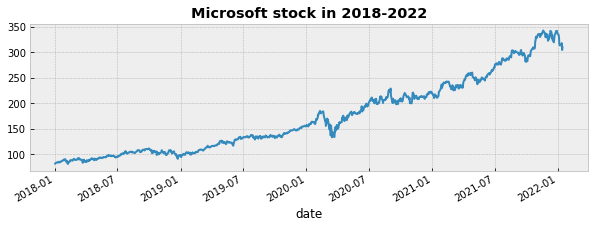

In [8]:
MSFT = retrieve_stock_data("MSFT", "2018-01-01", "2022-01-18")
fig = plt.figure()
fig.set_size_inches(10,3)
MSFT["adjclose"].plot()
plt.title("Microsoft stock in 2018-2022", weight="bold");


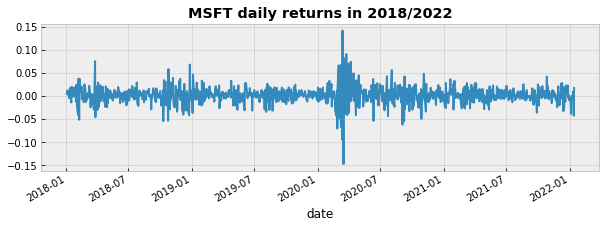

In [10]:
fig = plt.figure()
fig.set_size_inches(10,3)
MSFT["adjclose"].pct_change().plot()
plt.title("MSFT daily returns in 2018/2022", weight="bold");


0.018813329147505928

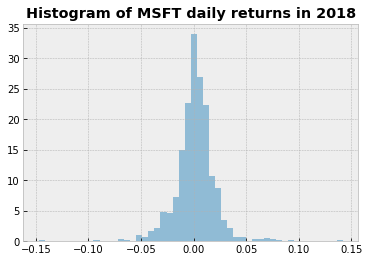

In [11]:
MSFT["adjclose"].pct_change().hist(bins=50, density=True, histtype="stepfilled", alpha=0.5)
plt.title("Histogram of MSFT daily returns in 2018", weight="bold")
MSFT["adjclose"].pct_change().std()


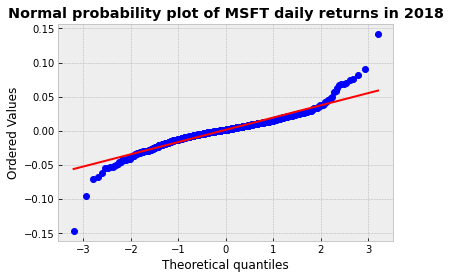

In [12]:
Q = MSFT["adjclose"].pct_change().dropna()
scipy.stats.probplot(Q, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111))
plt.title("Normal probability plot of MSFT daily returns in 2018", weight="bold");


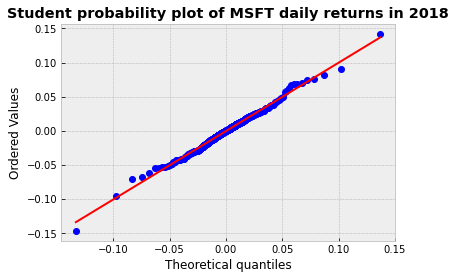

In [13]:
tdf, tmean, tsigma = scipy.stats.t.fit(Q)
scipy.stats.probplot(Q, dist=scipy.stats.t, sparams=(tdf, tmean, tsigma), plot=plt.figure().add_subplot(111))
plt.title("Student probability plot of MSFT daily returns in 2018", weight="bold");

In [14]:
import pandas_datareader.data as web
import datetime
import pandas as pd

In [15]:
start = datetime.datetime(2015,1,1)
end = datetime.datetime.now()

In [16]:
bmw = web.DataReader("BMW.DE", "yahoo", start, end)
bmw

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,89.589996,87.379997,88.599998,88.010002,1532820.0,64.752579
2015-01-05,87.230003,84.550003,87.180000,85.080002,2308143.0,62.596867
2015-01-06,87.120003,84.550003,85.800003,85.830002,1841589.0,63.148670
2015-01-07,87.050003,85.269997,86.400002,86.290001,1239393.0,63.487110
2015-01-08,89.870003,86.879997,87.519997,89.389999,1837539.0,65.767906
...,...,...,...,...,...,...
2022-01-18,99.669998,97.339996,98.370003,98.940002,930784.0,98.940002
2022-01-19,99.349998,97.540001,98.389999,97.860001,1133756.0,97.860001
2022-01-20,98.029999,95.800003,96.639999,96.830002,1100542.0,96.830002


In [17]:
bmw.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,89.589996,87.379997,88.599998,88.010002,1532820.0,64.752579
2015-01-05,87.230003,84.550003,87.180000,85.080002,2308143.0,62.596867
2015-01-06,87.120003,84.550003,85.800003,85.830002,1841589.0,63.148670
2015-01-07,87.050003,85.269997,86.400002,86.290001,1239393.0,63.487110
2015-01-08,89.870003,86.879997,87.519997,89.389999,1837539.0,65.767906


In [18]:
bmw.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-18,99.669998,97.339996,98.370003,98.940002,930784.0,98.940002
2022-01-19,99.349998,97.540001,98.389999,97.860001,1133756.0,97.860001
2022-01-20,98.029999,95.800003,96.639999,96.830002,1100542.0,96.830002
2022-01-21,95.559998,93.970001,95.199997,95.559998,1592557.0,95.559998
2022-01-24,96.400002,91.959999,95.000000,92.150002,824198.0,92.150002


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

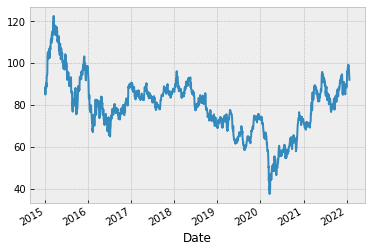

In [20]:
bmw["Close"].plot()
plt.show()

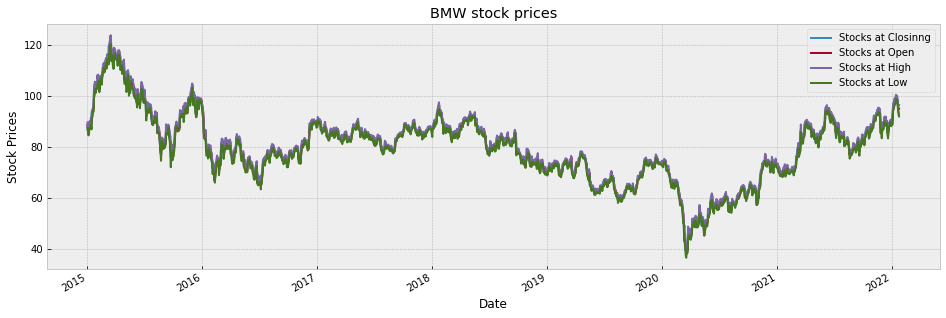

In [21]:
bmw["Close"].plot(label="Stocks at Closinng", figsize=(16,5))
bmw["Open"].plot(label="Stocks at Open")
bmw["High"].plot(label="Stocks at High")
bmw["Low"].plot(label="Stocks at Low")
plt.legend()
plt.title("BMW stock prices")
plt.ylabel("Stock Prices")
plt.show()

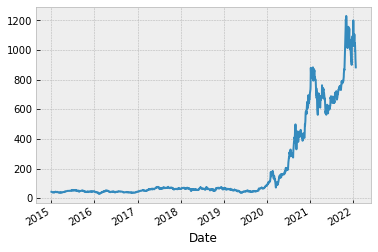

In [22]:
tesla = web.DataReader("TSLA", "yahoo", start, end)
tesla["Close"].plot()
plt.show()

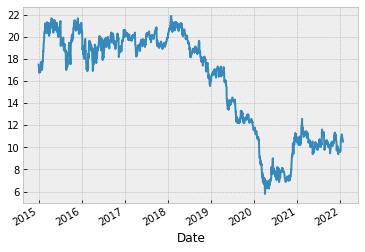

In [23]:
nissan = web.DataReader("NSANY", "yahoo", start, end)
nissan["Close"].plot()
plt.show()

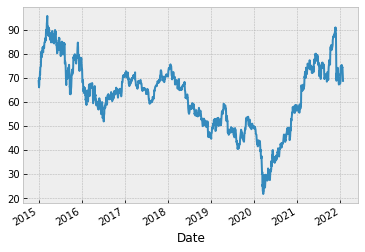

In [24]:
mercedes = web.DataReader("DAI.DE", "yahoo", start, end)
mercedes["Close"].plot()
plt.show()

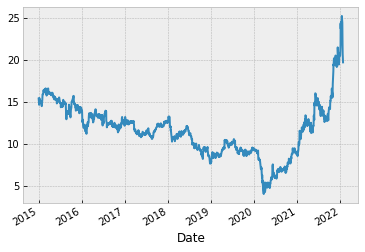

In [25]:
ford = web.DataReader("F", "yahoo", start, end)
ford["Close"].plot()
plt.show()

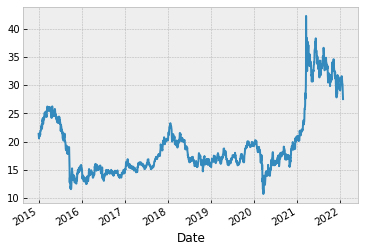

In [27]:
vw = web.DataReader("VWAGY","yahoo", start, end)
vw["Close"].plot()
plt.show()

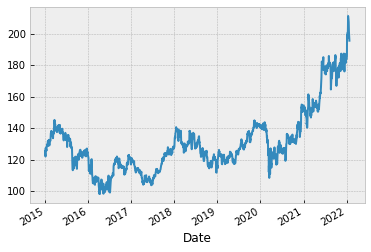

In [28]:
toyota = web.DataReader("TM", "yahoo", start, end)
toyota["Close"].plot()
plt.show()

In [29]:
tesla.to_csv("Tesla2015_2022")

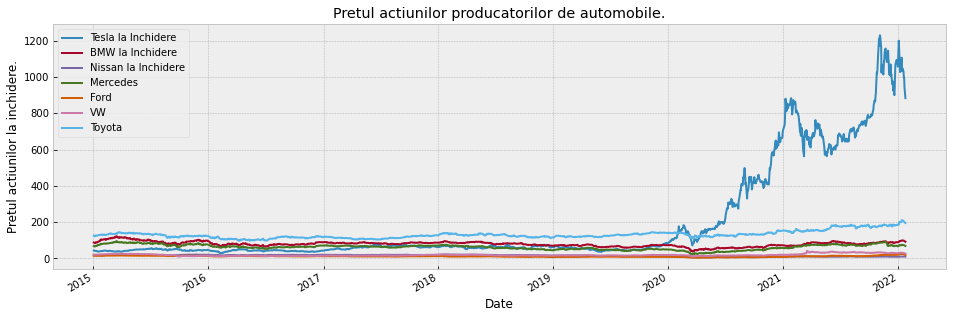

In [46]:
tesla["Close"].plot(label="Tesla la Inchidere", figsize=(16,5))
bmw["Close"].plot(label="BMW la Inchidere")
nissan["Close"].plot(label="Nissan la Inchidere")
mercedes["Close"].plot(label="Mercedes")
ford["Close"].plot(label="Ford")
vw["Close"].plot(label="VW")
toyota["Close"].plot(label="Toyota")

plt.legend()
plt.title("Pretul actiunilor producatorilor de automobile.")
plt.ylabel("Pretul actiunilor la inchidere.")
plt.savefig('test1.png', dpi=300, bbox_inches='tight')
plt.show()

# plt.savefig("auto.png")


In [47]:
# https://levelup.gitconnected.com/stock-market-analysis-using-python-pandas-ec278f76e217

In [48]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

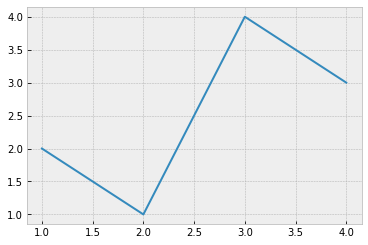

In [49]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4], [2,1,4,3])

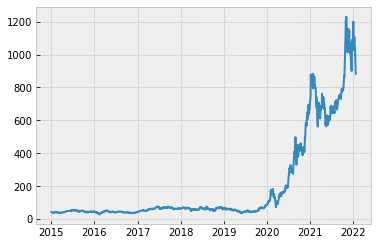

In [52]:
fig, ax = plt.subplots()
ax.plot(tesla["Close"])

In [53]:
web.get_data_fred("GS10")

,GS10
DATE,
2017-02-01,2.42
2017-03-01,2.48
2017-04-01,2.30
2017-05-01,2.30
2017-06-01,2.19
2017-07-01,2.32
2017-08-01,2.21
2017-09-01,2.20
2017-10-01,2.36


In [55]:
from pandas_datareader import wb

data = wb.download(indicator='FP.CPI.TOTL.ZG', country='all', start=2019, end=2021)
print(data)


                                  FP.CPI.TOTL.ZG
country                     year                
Africa Eastern and Southern 2020        4.978097
                            2019        3.923372
Africa Western and Central  2020        2.425007
                            2019        1.758565
Arab World                  2020        1.777408
...                                          ...
Yemen, Rep.                 2019             NaN
Zambia                      2020       15.732585
                            2019        9.150316
Zimbabwe                    2020             NaN
                            2019             NaN

[532 rows x 1 columns]


In [56]:
data = data.reset_index(1)
data.columns = ['year', 'inflation']
print(data)

                             year  inflation
country                                     
Africa Eastern and Southern  2020   4.978097
Africa Eastern and Southern  2019   3.923372
Africa Western and Central   2020   2.425007
Africa Western and Central   2019   1.758565
Arab World                   2020   1.777408
...                           ...        ...
Yemen, Rep.                  2019        NaN
Zambia                       2020  15.732585
Zambia                       2019   9.150316
Zimbabwe                     2020        NaN
Zimbabwe                     2019        NaN

[532 rows x 2 columns]


In [66]:
import geopandas

map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
map = map[map['name'] != 'Antarctica']
print(map)


ModuleNotFoundError: No module named 'geopandas'

In [59]:
from yahoofinancials import YahooFinancials

ticker = 'AAPL'
yahoo_financials = YahooFinancials(ticker)

In [63]:
yahoo_financials.get_total_revenue()

365817000000

In [71]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

plt.style.use("classic")

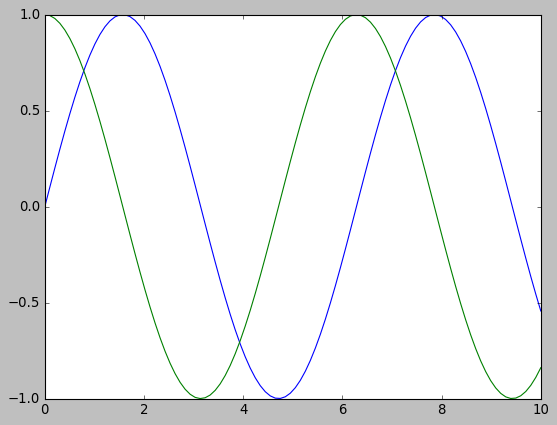

In [65]:
x =np.linspace(0,10,100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()

In [68]:
import yfinance as yf
data = yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  2 of 2 completed


In [69]:
data

Adj Close                  Close                   High  \
                 AAPL         SPY       AAPL         SPY       AAPL   
Date                                                                  
2017-01-03  27.332468  206.147522  29.037500  225.240005  29.082500   
2017-01-04  27.301880  207.373932  29.004999  226.580002  29.127501   
2017-01-05  27.440722  207.209229  29.152500  226.399994  29.215000   
2017-01-06  27.746632  207.950562  29.477501  227.210007  29.540001   
2017-01-09  28.000778  207.264114  29.747499  226.460007  29.857500   
...               ...         ...        ...         ...        ...   
2017-04-24  33.947983  218.010590  35.910000  237.169998  35.987499   
2017-04-25  34.158314  219.279144  36.132500  238.550003  36.224998   
2017-04-26  33.957432  219.141251  35.919998  238.399994  36.150002   
2017-04-27  33.983429  219.325089  35.947498  238.600006  36.040001   
2017-04-28  33.950340  218.847137  35.912498  238.080002  36.075001   

                              Low                   Open              \
                   SPY       AAPL         SPY       AAPL         SPY   
Date                                                                   
2017-01-03  225.830002  28.690001  223.880005  28.950001  225.039993   
2017-01-04  226.750000  28.937500  225.610001  28.962500  225.619995   
2017-01-05  226.580002  28.952499  225.479996  28.980000  226.270004   
2017-01-06  227.750000  29.117500  225.899994  29.195000  226.529999   
2017-01-09  227.070007  29.485001  226.419998  29.487499  226.910004   
...                ...        ...         ...        ...         ...   
2017-04-24  237.410004  35.794998  234.559998  35.875000  237.179993   
2017-04-25  238.949997  35.967499  237.809998  35.977501  237.910004   
2017-04-26  239.529999  35.845001  238.350006  36.117500  238.509995   
2017-04-27  238.949997  35.827499  237.979996  35.980000  238.770004   
2017-04-28  238.929993  35.817501  237.929993  36.022499  238.899994   

               Volume             
                 AAPL        SPY  
Date                              
2017-01-03  115127600   91366500  
2017-01-04   84472400   78744400  
2017-01-05   88774400   78379000  
2017-01-06  127007600   71559900  
2017-01-09  134247600   46939700  
...               ...        ...  
2017-04-24   68537200  119209900  
2017-04-25   75486000   76698300  
2017-04-26   80164800   84702500  
2017-04-27   56985200   57410300  
2017-04-28   83441600   63532800  

[81 rows x 12 columns]

In [72]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
width = 28000000; lon_0 = -105; lat_0 = 40
m = Basemap(width=width,height=width,projection='aeqd',
            lat_0=lat_0,lon_0=lon_0)
# fill background.
m.drawmapboundary(fill_color='aqua')
# draw coasts and fill continents.
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='coral',lake_color='aqua')
# 20 degree graticule.
m.drawparallels(np.arange(-80,81,20))
m.drawmeridians(np.arange(-180,180,20))
# draw a black dot at the center.
xpt, ypt = m(lon_0, lat_0)
m.plot([xpt],[ypt],'ko')
# draw the title.
plt.title('Azimuthal Equidistant Projection')
plt.show()

ImportError: cannot import name 'dedent' from 'matplotlib.cbook' (/home/mhcrnl/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py)

In [73]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
m = Basemap(width=15.e6,height=15.e6,\
            projection='gnom',lat_0=60.,lon_0=-30.)
m.drawmapboundary(fill_color='aqua')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawparallels(np.arange(10,90,20))
m.drawmeridians(np.arange(-180,180,30))
plt.title('Gnomonic Projection')
plt.show()


ImportError: cannot import name 'dedent' from 'matplotlib.cbook' (/home/mhcrnl/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py)